# Projekt - Strojno učenje
## EDA Student Performance Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Data Cleaning
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Pošto nam je bitan samo kumulativni score studenata , vidjet ćemo ako možemo naći neki parametar kao linearnu kombinaciju tih ,zbog jednostavnosti.

In [5]:
#Creating a new variable Percentage 

df['Total score'] = ((df['math score']+df['writing score']+df['reading score'])/3).round(2)

Skup podataka: imamo 9 stupaca i 1000 podataka o studentima

In [6]:
df.shape

(1000, 9)

### Pregled kategoričkih varijabli u datasetu

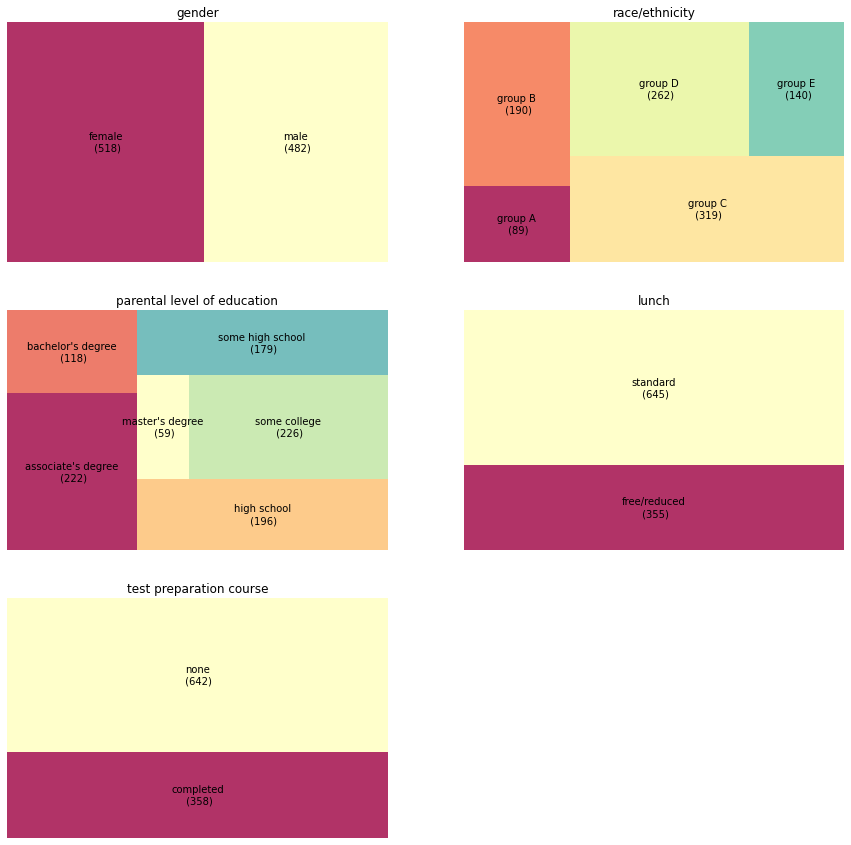

In [7]:
f, axes=plt.subplots(3, 2, figsize=(15, 15))

for i in range(5):
    plt.subplot(3, 2, i+1)
    
    df_grouped= df.groupby(df.columns[i]).size().reset_index(name='counts')
    labels = df_grouped.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = df_grouped['counts'].values.tolist()
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
    
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
    plt.title(df.columns[i])
    plt.axis('off')
    
plt.subplot(3, 2, 6)
plt.axis('off')

plt.show()

### Pregled numeričkih varijabli u datasetu

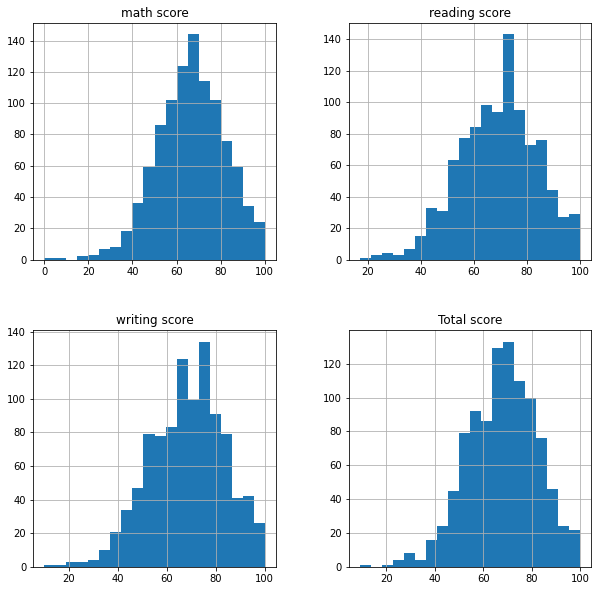

In [8]:
df.hist(figsize=(10,10),bins = 20)
plt.show()

## Eksploratorna analiza

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


### Usporedba spola

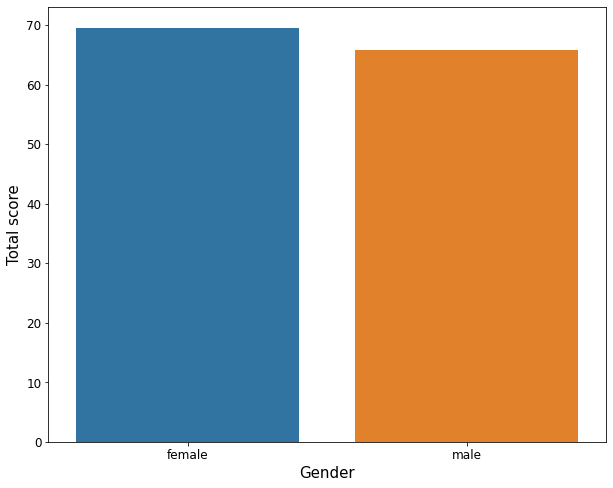

In [10]:
plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'gender', y = 'Total score', ci = False)
plt.xticks(fontsize = 12)
plt.xlabel('Gender', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Total score', fontsize = 15)
plt.show()

Zaključak: rezultati učenika ženskog spola su u prosjeku bolji nego muški

### Utjecaj priprema za faks na rezultate učenika

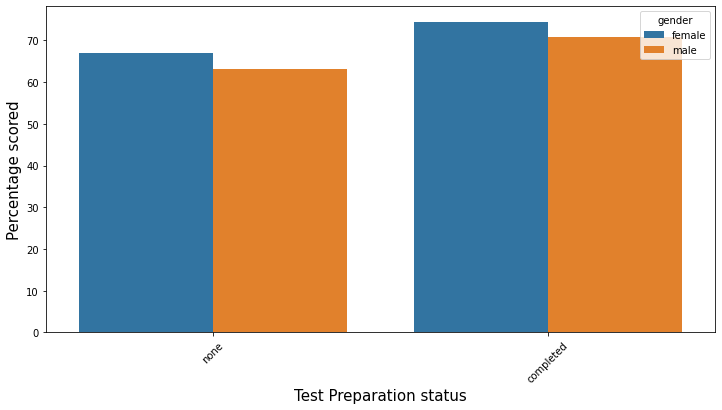

In [11]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = 'test preparation course', y = 'Total score', hue = 'gender', ci = False)
plt.xlabel('Test Preparation status', fontsize = 15)
plt.xticks(rotation = 45)
plt.ylabel('Percentage scored', fontsize = 15)
plt.show()

Zaključak:

    Studenti koji uzimaju pripreme prije upisa imaju u prosjeku bolje rezultate od onih koji te pripreme nisu uzeli.
    Neovisno o uzimanju priprema, žene su postigle bolje rezultate.
   

### Utjecaj rase na rezultate

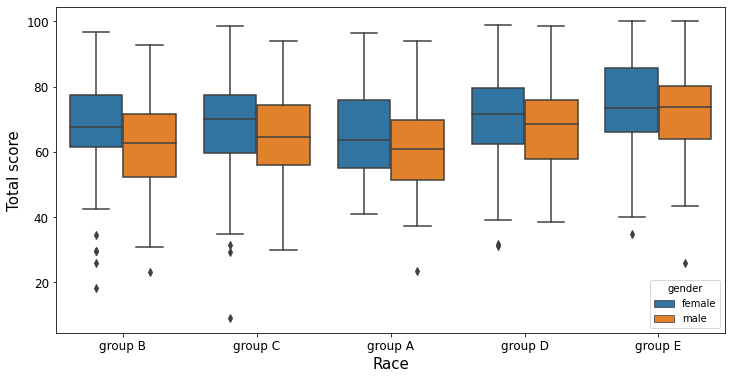

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'race/ethnicity', y = 'Total score', hue = 'gender')
plt.xlabel('Race', fontsize = 15)
plt.ylabel('Total score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

    Grupa E je postigla puno bolje rezultate od ostalih grupa.
    Također,vidi se da su žene postigle puno bolje rezultate od muškaraca,neovisno kojoj rasnoj grupi ovdje pripadaju.
    Postoji dosta izoliranih točaka, tj. studenata većinom muških koji su testove riješili puno lošije od prosjeka.
   

(array([1, 2, 3, 4]),
 [Text(1, 0, 'math score'),
  Text(2, 0, 'reading score'),
  Text(3, 0, 'writing score'),
  Text(4, 0, 'Total score')])

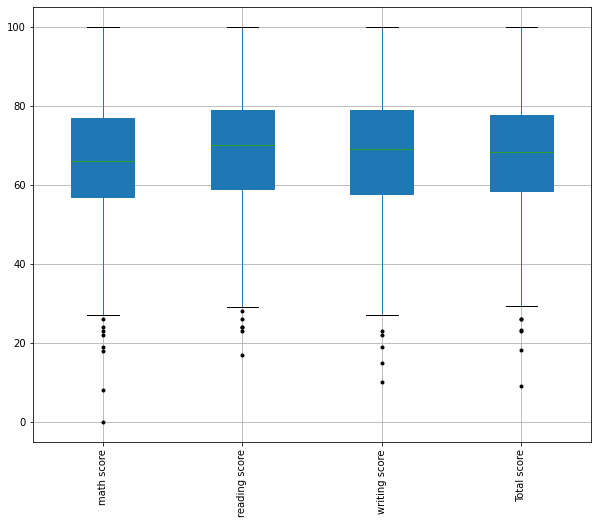

In [13]:
plt.subplots(figsize=(10,8))
df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)


    Primjetimo da kad se uspoređuju pojedini rezultati ispita, matematiku je rješilo dosta studenata lošije
    nego ispit pisanja i čitanja (što će još dokazati test korecije niže).

### Korelacije između numeričkih varijabli - vrsta ispita između studenata

<AxesSubplot:>

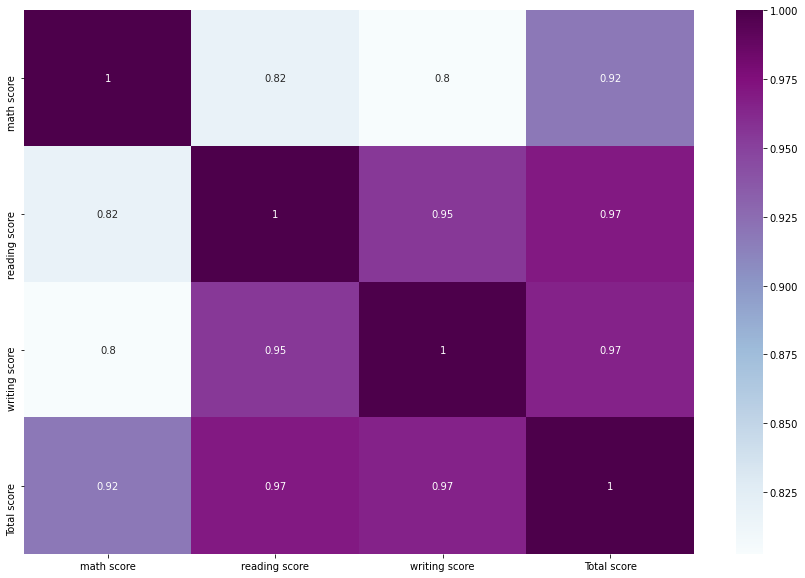

In [14]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

    Testovi iz čitanja i pisanja puno više koreliraju skupa nego test iz matematike. 
    Zato i zajednička mjera više korelira s ta dva ispita.

### Kumulativni prikaz rezultata ovisnosti vrste ručka s rezultatima ispita - grupirano po rasi/etnicitetu

<AxesSubplot:xlabel='None-race/ethnicity', ylabel='lunch'>

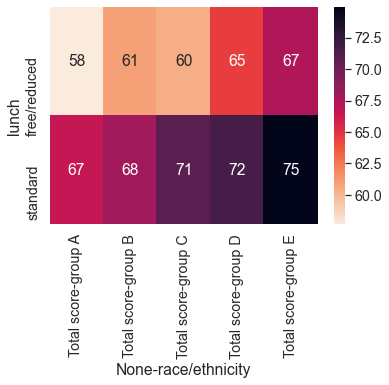

In [17]:

k = pd.pivot_table(data=df ,
                   index=['lunch'],
                   columns=['race/ethnicity'] ,
                   aggfunc={'Total score' : np.mean} )
sns.set(font_scale=1.3)
sns.heatmap(data=k,annot=True , cmap='rocket_r')

    Može se primjetiti da skupina studenata is rasne skupine E s boljim ručkom ima u prosjeku najbolje rezultate na ispitima,
    a skupina A kojima je ručak lošiji u prosjeku ima lošije rezultate od ostalih grupa.

### Kumulativni prikaz rezultata ovisnosti vrste obrazovanja roditelja s rezultatima ispita - grupirano po rasi/etnicitetu

<AxesSubplot:xlabel='None-test preparation course', ylabel='gender'>

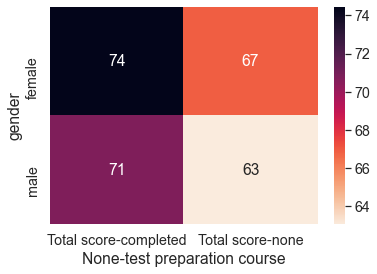

In [19]:

k = pd.pivot_table(data=df ,
                   index=['gender'],
                   columns=['test preparation course'] ,
                   aggfunc={'Total score' : np.mean} )
sns.set(font_scale=1.3)
sns.heatmap(data=k,annot=True , cmap='rocket_r')

Može se zaključiti da oni studenti u rasnoj grupi E,kojima su roditelji diplomirali u projeku imaju bolje rezultate od ostalih grupa, dok na primjer grupa A kojima roditelji imaju obrazovanje niže od srednjoškolskog u prosjeku imaju lošije rezultate od ostalih grupa.